In [63]:
# Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

import joblib
import pickle

import warnings 
warnings.filterwarnings('ignore')

In [64]:
# Connector for python programs to access MySQL databases

from sqlalchemy import create_engine
from urllib.parse import quote 

user_name = 'root'
database = 'SCM_allot'
your_password = 'Sql@12345'
engine = create_engine(f'mysql+pymysql://{user_name}:%s@localhost:3306/{database}' % quote(f'{your_password}'))

sql_query = "select * from SCM_allot.allot"

df = pd.read_sql(sql_query,engine)

df

,POSTING DATE,EFFECTIVE DATE,CREATE DATE,Customer/Vendor Code,Customer/Vendor Name,LOB,Region,BP TYPE,City,STATE,...,BP CATEGORY,Document Type,Vehicle Type,Direct Dispatch,Comments,U_GRNNO,Loading/Unloading,Detention,KITITEM,U_AssetClass
0,06-12-2019,06-12-2019,06-12-2019,10002355,Cart Services Pvt. Ltd. _ Howrah _Uluberia ES...,FMCG,East,RENTAL,Howrah,West Bengal,...,Ecommerce,Allot,19ft Vehicle,N,191900083,NaN,800.0,NaN,None,Wooden Pallet
1,06-12-2019,06-12-2019,06-12-2019,10002355,Cart Services Pvt. Ltd. _ Howrah _Uluberia ES...,FMCG,East,RENTAL,Howrah,West Bengal,...,Ecommerce,Allot,19ft Part Load,N,191900082,NaN,800.0,NaN,None,Wooden Pallet
2,20-12-2019,20-12-2019,20-12-2019,10003155,Cart Services Pvt Ltd _ Gurgoan _Embassy Ind...,FMCG,North,RENTAL,Gurgaon,Haryana,...,Ecommerce,Allot,32ft SXL,N,61900469,NaN,0.0,NaN,None,Wooden Pallet
3,26-12-2019,26-12-2019,26-12-2019,10001155,Cart Services Pvt. Ltd. _ Gurgoan _ Tauru,FMCG,North,RENTAL,Gurgaon,Haryana,...,Ecommerce,Allot,19ft Vehicle,N,61900477,NaN,0.0,NaN,None,Wooden Pallet
4,26-12-2019,26-12-2019,26-12-2019,10001155,Cart Services Pvt. Ltd. _ Gurgoan _ Tauru,FMCG,North,RENTAL,Gurgaon,Haryana,...,Ecommerce,Allot,32ft SXL,N,61900478,NaN,0.0,NaN,None,Wooden Pallet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,19-11-2022,19-11-2022,19-11-2022,10008314,Cart Services Private Limited_ Unnao_Hasanganj,FMCG,North,RENTAL,Unnao,Uttar Pradesh,...,3PL,Allot,32ft MXL,Y,None,2742.0,0.0,0.0,None,Wooden Pallet
1578,21-11-2022,21-11-2022,21-11-2022,10008314,Cart Services Private Limited_ Unnao_Hasanganj,FMCG,North,RENTAL,Unnao,Uttar Pradesh,...,3PL,Allot,32ft MXL,Y,None,2758.0,NaN,NaN,None,Wooden Pallet
1579,22-11-2022,22-11-2022,22-11-2022,10006814,Cart Services Pvt. Ltd. _ Bhiwandi_CF,FMCG,West,RENTAL,Thane,Maharashtra,...,Ecommerce,Allot,20ft Vehicle,N,None,NaN,NaN,NaN,None,Wooden Pallet
1580,26-11-2022,26-11-2022,26-11-2022,10006524,Cart Services Pvt. Ltd. _ Hyderabad _Pudur,FMCG,South,RENTAL,Hyderabad,Telangana,...,Ecommerce,Allot,32ft SXL,N,None,NaN,NaN,NaN,None,Wooden Pallet


In [65]:
# Gives the no. of rows & columns
df.shape

(1582, 39)

In [66]:
# Gives the names of the columns
df.columns

Index(['POSTING DATE', 'EFFECTIVE DATE', 'CREATE DATE', 'Customer/Vendor Code',
       'Customer/Vendor Name', 'LOB', 'Region', 'BP TYPE', 'City', 'STATE',
       'From WhsCode', 'From WhsName', 'To whsCode', 'TO WhsName',
       'Model TYPE', 'Transfer Type', 'U_Frt', 'U_ActShipType',
       'PRODUCT CATEGORY', 'ItemCode', 'QUANTITY', 'UNIT', 'RATE', 'SO ID',
       'SO Creation Date', 'SO Due Date', 'U_DocStatus', 'NumAtCard',
       'U_SOTYPE', 'BP CATEGORY', 'Document Type', 'Vehicle Type',
       'Direct Dispatch', 'Comments', 'U_GRNNO', 'Loading/Unloading',
       'Detention', 'KITITEM', 'U_AssetClass'],
      dtype='object')

In [67]:
 # Gives information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   POSTING DATE          1582 non-null   object 
 1   EFFECTIVE DATE        1582 non-null   object 
 2   CREATE DATE           1582 non-null   object 
 3   Customer/Vendor Code  1582 non-null   int64  
 4   Customer/Vendor Name  1582 non-null   object 
 5   LOB                   1582 non-null   object 
 6   Region                1582 non-null   object 
 7   BP TYPE               1582 non-null   object 
 8   City                  1582 non-null   object 
 9   STATE                 1582 non-null   object 
 10  From WhsCode          1582 non-null   object 
 11  From WhsName          1582 non-null   object 
 12  To whsCode            1582 non-null   int64  
 13  TO WhsName            1582 non-null   object 
 14  Model TYPE            1582 non-null   object 
 15  Transfer Type        

In [68]:
# The data type of the Date_Time column is object, and we need to change it to datetime.

df['POSTING DATE'] = pd.to_datetime(df['POSTING DATE'] , format = '%d-%m-%Y')
data = df.drop(['POSTING DATE'], axis=1)
data.index = df['POSTING DATE']

df['EFFECTIVE DATE'] = pd.to_datetime(df['EFFECTIVE DATE'] , format = '%d-%m-%Y')
data = df.drop(['EFFECTIVE DATE'], axis=1)
data.index = df['EFFECTIVE DATE']

df['CREATE DATE'] = pd.to_datetime(df['CREATE DATE'] , format = '%d-%m-%Y')
data = df.drop(['CREATE DATE'], axis=1)
data.index = df['CREATE DATE']

In [69]:
 # Gives information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   POSTING DATE          1582 non-null   datetime64[ns]
 1   EFFECTIVE DATE        1582 non-null   datetime64[ns]
 2   CREATE DATE           1582 non-null   datetime64[ns]
 3   Customer/Vendor Code  1582 non-null   int64         
 4   Customer/Vendor Name  1582 non-null   object        
 5   LOB                   1582 non-null   object        
 6   Region                1582 non-null   object        
 7   BP TYPE               1582 non-null   object        
 8   City                  1582 non-null   object        
 9   STATE                 1582 non-null   object        
 10  From WhsCode          1582 non-null   object        
 11  From WhsName          1582 non-null   object        
 12  To whsCode            1582 non-null   int64         
 13  TO WhsName        

In [8]:
# Checking for 0 values

df.isna().sum()

POSTING DATE               0
EFFECTIVE DATE             0
CREATE DATE                0
Customer/Vendor Code       0
Customer/Vendor Name       0
LOB                        0
Region                     0
BP TYPE                    0
City                       0
STATE                      0
From WhsCode               0
From WhsName               0
To whsCode                 0
TO WhsName                 0
Model TYPE                 0
Transfer Type              0
U_Frt                      4
U_ActShipType              0
PRODUCT CATEGORY           0
ItemCode                   0
QUANTITY                   0
UNIT                       0
RATE                       0
SO ID                      0
SO Creation Date           0
SO Due Date                0
U_DocStatus                0
NumAtCard               1582
U_SOTYPE                   0
BP CATEGORY                0
Document Type              0
Vehicle Type               0
Direct Dispatch            0
Comments                1549
U_GRNNO       

In [9]:
# Gives descriptive statistics
df.describe()

,Customer/Vendor Code,To whsCode,U_Frt,QUANTITY,RATE,U_GRNNO,Loading/Unloading,Detention
count,1.582000e+03,1.582000e+03,1578.000000,1582.000000,1582.000000,721.000000,1095.000000,444.0
mean,1.000486e+07,1.000486e+07,1816.297212,300.848293,2053.465234,1801.858530,26.669406,0.0
std,2.238812e+03,2.238812e+03,7623.607054,127.789016,376.862570,1196.054914,171.724175,0.0
min,1.000041e+07,1.000041e+07,0.000000,1.000000,1200.000000,1.000000,0.000000,0.0
25%,1.000242e+07,1.000242e+07,1.000000,200.000000,1950.000000,1138.000000,0.000000,0.0
50%,1.000624e+07,1.000624e+07,1.000000,300.000000,1950.000000,1444.000000,0.000000,0.0
75%,1.000652e+07,1.000652e+07,15.000000,400.000000,1950.000000,2102.000000,0.000000,0.0
max,1.000834e+07,1.000834e+07,136000.000000,540.000000,3375.000000,12282.000000,1800.000000,0.0


In [10]:
# Separating numerical columns

df_num = df.select_dtypes(include=np.number)
df_num

,Customer/Vendor Code,To whsCode,U_Frt,QUANTITY,RATE,U_GRNNO,Loading/Unloading,Detention
0,10002355,10002355,8500.0,200,1950,NaN,800.0,NaN
1,10002355,10002355,8500.0,200,1950,NaN,800.0,NaN
2,10003155,10003155,4500.0,200,2599,NaN,0.0,NaN
3,10001155,10001155,3500.0,180,1950,NaN,0.0,NaN
4,10001155,10001155,4500.0,326,1950,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...
1577,10008314,10008314,15.0,500,1950,2742.0,0.0,0.0
1578,10008314,10008314,15.0,490,1950,2758.0,NaN,NaN
1579,10006814,10006814,6.0,200,1250,NaN,NaN,NaN
1580,10006524,10006524,1.0,200,1250,NaN,NaN,NaN


In [11]:
# Mean
df_num.mean()

Customer/Vendor Code    1.000486e+07
To whsCode              1.000486e+07
U_Frt                   1.816297e+03
QUANTITY                3.008483e+02
RATE                    2.053465e+03
U_GRNNO                 1.801859e+03
Loading/Unloading       2.666941e+01
Detention               0.000000e+00
dtype: float64

In [12]:
# Median
df_num.median()

Customer/Vendor Code    10006243.0
To whsCode              10006243.0
U_Frt                          1.0
QUANTITY                     300.0
RATE                        1950.0
U_GRNNO                     1444.0
Loading/Unloading              0.0
Detention                      0.0
dtype: float64

In [13]:
# Mode
df.mode().head()

,POSTING DATE,EFFECTIVE DATE,CREATE DATE,Customer/Vendor Code,Customer/Vendor Name,LOB,Region,BP TYPE,City,STATE,...,BP CATEGORY,Document Type,Vehicle Type,Direct Dispatch,Comments,U_GRNNO,Loading/Unloading,Detention,KITITEM,U_AssetClass
0,2020-09-05,2020-09-05,2020-09-05,10002430.0,Cart Services Pvt. Ltd. _ Kolkata _Bagnan,FMCG,South,RENTAL,Bangalore,Tamil Nadu,...,Ecommerce,Allot,32ft SXL,N,10006210 T0 10006453 direct Dispatch.,1235.0,0.0,0.0,NaN,Wooden Pallet
1,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10006210 to 10006453 Direct Dispatch.,NaN,NaN,NaN,NaN,NaN
2,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,191900082,NaN,NaN,NaN,NaN,NaN
3,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,191900083,NaN,NaN,NaN,NaN,NaN
4,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,271902158,NaN,NaN,NaN,NaN,NaN


In [14]:
# Variance
df_num.var()

Customer/Vendor Code    5.012281e+06
To whsCode              5.012281e+06
U_Frt                   5.811938e+07
QUANTITY                1.633003e+04
RATE                    1.420254e+05
U_GRNNO                 1.430547e+06
Loading/Unloading       2.948919e+04
Detention               0.000000e+00
dtype: float64

In [15]:
# Standard Deviation  
df_num.std()

Customer/Vendor Code    2238.812447
To whsCode              2238.812447
U_Frt                   7623.607054
QUANTITY                 127.789016
RATE                     376.862570
U_GRNNO                 1196.054914
Loading/Unloading        171.724175
Detention                  0.000000
dtype: float64

In [16]:
# Skewness 
df_num.skew()

Customer/Vendor Code    -0.615447
To whsCode              -0.615447
U_Frt                   11.810239
QUANTITY                -0.007436
RATE                     1.213583
U_GRNNO                  2.909106
Loading/Unloading        6.597956
Detention                0.000000
dtype: float64

In [17]:
# Kurtosis
df_num.kurt()

Customer/Vendor Code     -1.390454
To whsCode               -1.390454
U_Frt                   179.052655
QUANTITY                 -0.832007
RATE                      1.000093
U_GRNNO                  16.320121
Loading/Unloading        43.845848
Detention                 0.000000
dtype: float64

### Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

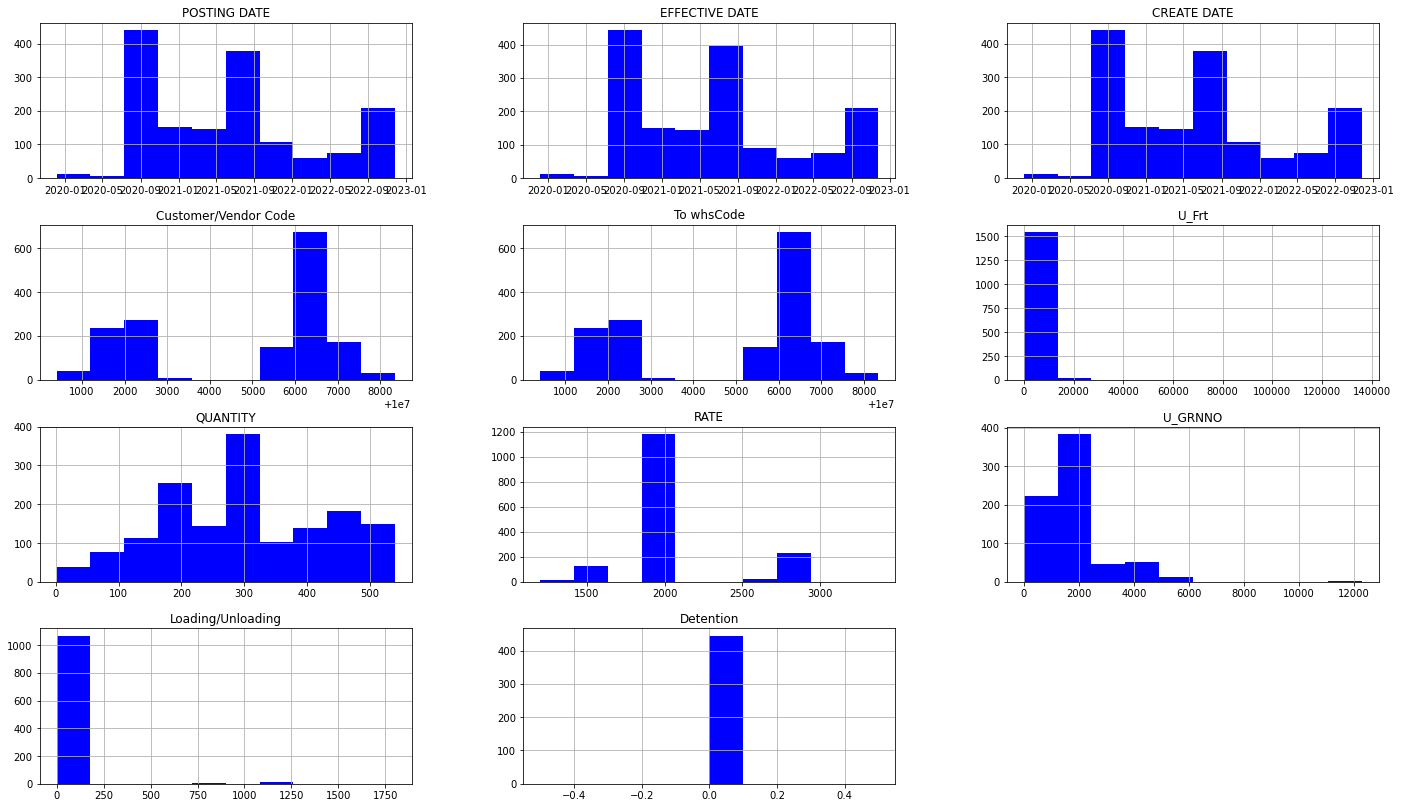

In [18]:
# Plots histogram for all the variables in the datset 

df.hist(bins = 10, figsize = (24,14), color='Blue')
plt.show

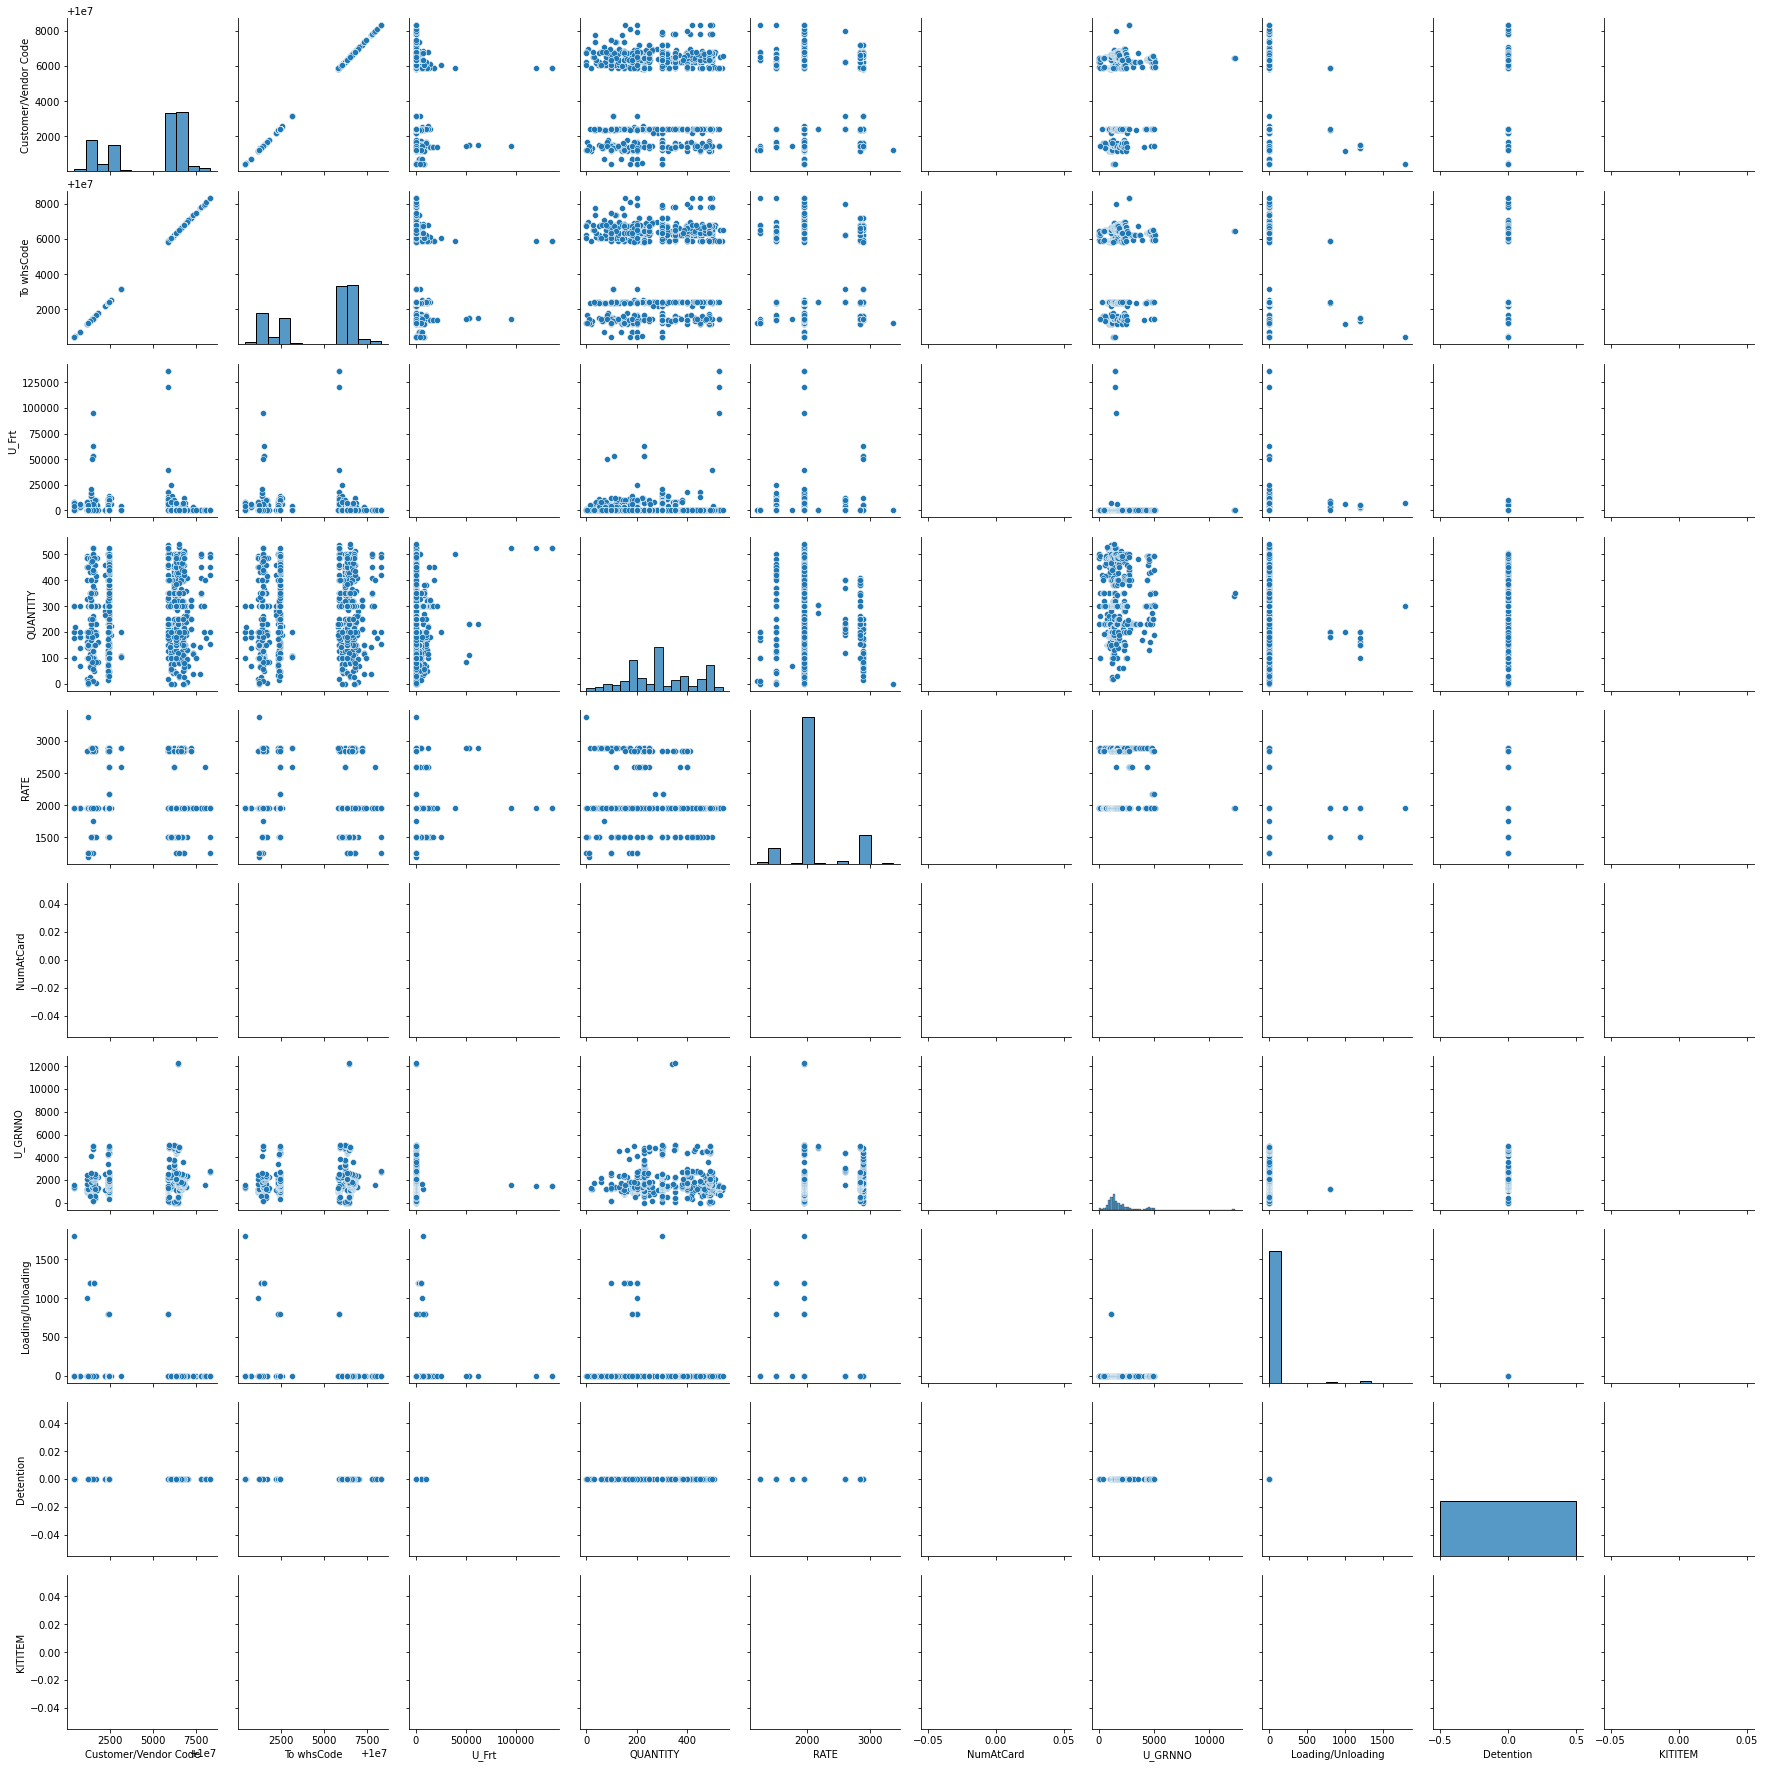

In [109]:
# Creates a Pairplot

sns.pairplot(df.iloc[:, :])

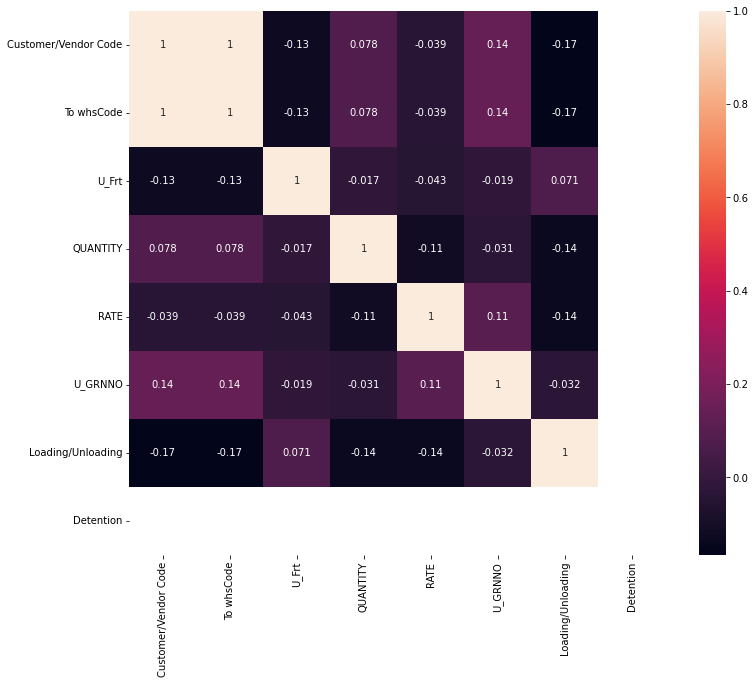

In [110]:
# Creates a Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [111]:
# Gives Correlation matrix

df.corr()

,Customer/Vendor Code,To whsCode,U_Frt,QUANTITY,RATE,U_GRNNO,Loading/Unloading,Detention
Customer/Vendor Code,1.000000,1.000000,-0.126857,0.077989,-0.038502,0.140645,-0.165737,NaN
To whsCode,1.000000,1.000000,-0.126857,0.077989,-0.038502,0.140645,-0.165737,NaN
U_Frt,-0.126857,-0.126857,1.000000,-0.017255,-0.043419,-0.019133,0.071259,NaN
QUANTITY,0.077989,0.077989,-0.017255,1.000000,-0.113073,-0.031411,-0.137651,NaN
RATE,-0.038502,-0.038502,-0.043419,-0.113073,1.000000,0.106604,-0.137391,NaN
U_GRNNO,0.140645,0.140645,-0.019133,-0.031411,0.106604,1.000000,-0.031884,NaN
Loading/Unloading,-0.165737,-0.165737,0.071259,-0.137651,-0.137391,-0.031884,1.000000,NaN
Detention,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


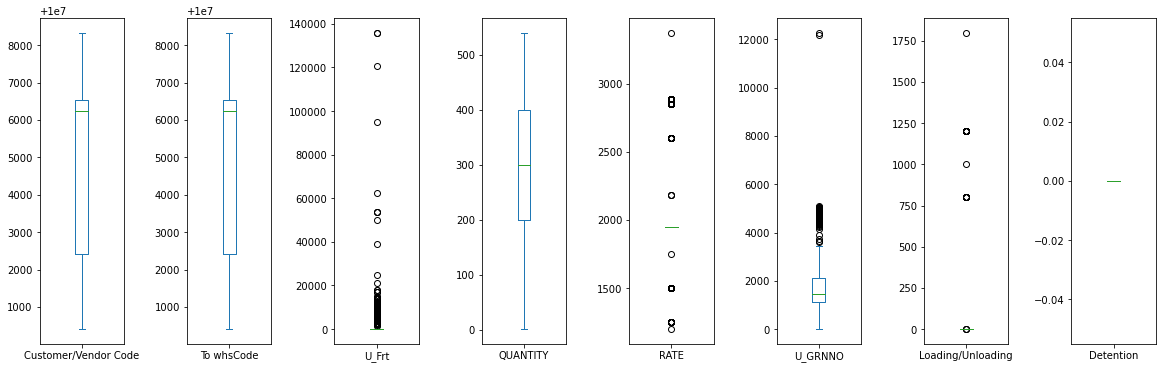

In [112]:
# Gives the multiple Boxplots in a single visualization

df.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6)) 
plt.subplots_adjust(wspace = 0.75) 
plt.show()

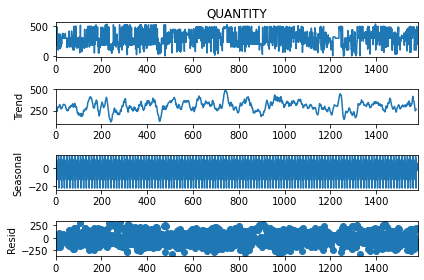

In [18]:
# To check for seasonality and trends

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['QUANTITY'], model='additive', period=12)
decomposition.plot()
plt.show()

### Data Preprocessing

In [26]:
df.columns

Index(['POSTING DATE', 'EFFECTIVE DATE', 'CREATE DATE', 'Customer/Vendor Code',
       'Customer/Vendor Name', 'LOB', 'Region', 'BP TYPE', 'City', 'STATE',
       'From WhsCode', 'From WhsName', 'To whsCode', 'TO WhsName',
       'Model TYPE', 'Transfer Type', 'U_Frt', 'U_ActShipType',
       'PRODUCT CATEGORY', 'ItemCode', 'QUANTITY', 'UNIT', 'RATE', 'SO ID',
       'SO Creation Date', 'SO Due Date', 'U_DocStatus', 'NumAtCard',
       'U_SOTYPE', 'BP CATEGORY', 'Document Type', 'Vehicle Type',
       'Direct Dispatch', 'Comments', 'U_GRNNO', 'Loading/Unloading',
       'Detention', 'KITITEM', 'U_AssetClass'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   POSTING DATE          1582 non-null   datetime64[ns]
 1   EFFECTIVE DATE        1582 non-null   datetime64[ns]
 2   CREATE DATE           1582 non-null   datetime64[ns]
 3   Customer/Vendor Code  1582 non-null   int64         
 4   Customer/Vendor Name  1582 non-null   object        
 5   LOB                   1582 non-null   object        
 6   Region                1582 non-null   object        
 7   BP TYPE               1582 non-null   object        
 8   City                  1582 non-null   object        
 9   STATE                 1582 non-null   object        
 10  From WhsCode          1582 non-null   object        
 11  From WhsName          1582 non-null   object        
 12  To whsCode            1582 non-null   int64         
 13  TO WhsName        

In [19]:
# Checking for the sequence of data

# Sort the data by timestamp
df = df.sort_values('POSTING DATE')

# Calculate time difference between consecutive data points
time_diff = (df['POSTING DATE'].iloc[1:] - df['POSTING DATE'].iloc[:-1]).reset_index(drop=True)

# Check if time difference is consistent or not
is_sequence = (time_diff == time_diff.iloc[0]).all()

# Print result
if is_sequence:
    print("Time series data is in sequence.")
else:
    print("Time series data is not in sequence.")

Time series data is not in sequence.


In [70]:
# Resampling the data

df['POSTING DATE'] = pd.to_datetime(df['POSTING DATE'], errors='coerce')

df = df.resample('W', on='POSTING DATE').sum()
df

,Customer/Vendor Code,To whsCode,U_Frt,QUANTITY,RATE,U_GRNNO,Loading/Unloading,Detention
POSTING DATE,,,,,,,,
2019-12-08,20004710,20004710,17000.0,400,3900,0.0,1600.0,0.0
2019-12-15,0,0,0.0,0,0,0.0,0.0,0.0
2019-12-22,10003155,10003155,4500.0,200,2599,0.0,0.0,0.0
2019-12-29,30003465,30003465,8000.0,1000,5850,0.0,0.0,0.0
2020-01-05,0,0,0.0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-30,0,0,0.0,0,0,0.0,0.0,0.0
2022-11-06,10007480,10007480,15.0,100,1950,0.0,0.0,0.0
2022-11-13,40019163,40019163,31.0,875,5950,0.0,0.0,0.0


In [71]:
# Creating a new variable with relevant columns only
new_df = df.loc[:, ['QUANTITY']]
new_df

,QUANTITY
POSTING DATE,
2019-12-08,400
2019-12-15,0
2019-12-22,200
2019-12-29,1000
2020-01-05,0
...,...
2022-10-30,0
2022-11-06,100
2022-11-13,875


#### Missing values - To find missing values

In [72]:
# Checking for missing values

(new_df == 0).sum()

QUANTITY    40
dtype: int64

In [73]:
# Replacing 0 values with 'NaN' values

new_df.replace(0, np.NaN, inplace=True)

In [24]:
# Checking for nan values

new_df.isna().mean()*100

QUANTITY    25.641026
dtype: float64

In [25]:
# Filling the missing value using Forward fill method

ffill = new_df.fillna(method='ffill')
ffill.isna().sum()

QUANTITY    0
dtype: int64

In [106]:
# Bfill imputation

bfill = new_df.fillna(method='bfill')
bfill.isna().sum()

QUANTITY    0
dtype: int64

In [107]:
# Linear interpolation

lin_interpolation = new_df.interpolate(method='linear')
lin_interpolation.isna().sum()

QUANTITY    0
dtype: int64

In [108]:
# Quadratic interpolation

qua_interpolation = new_df.interpolate(method='quadratic')
qua_interpolation.isna().sum()

QUANTITY    0
dtype: int64

In [109]:
# Spline interpolation

spl_interpolation = new_df.interpolate(option='spline')
spl_interpolation.isna().sum()

QUANTITY    0
dtype: int64

In [14]:
# CubicSpline interpolation

from scipy.interpolate import CubicSpline

cub_interpolation = new_df.interpolate(option='cubic')
cub_interpolation.isna().sum()

QUANTITY    0
dtype: int64

In [111]:
# KNN Imputation

from sklearn.impute import KNNImputer

# create KNN imputer object and perform imputation
imputer = KNNImputer(n_neighbors=2)
df_imputed = imputer.fit_transform(new_df)

# check if any missing values still exist in the imputed DataFrame
missing_values = pd.DataFrame(df_imputed).isnull().sum()

# Checking for missing values

missing_values.isna().sum()

0

In [74]:
# Applying Cubic interpolation to the data

cub_interpolation = new_df.interpolate(option='cubic', inplace=True)

new_df.isna().sum()

QUANTITY    0
dtype: int64

In [75]:
# Saves the missing values process 
joblib.dump(cub_interpolation, "impute")

['impute']

#### Outlier Treatment - To treat outliers

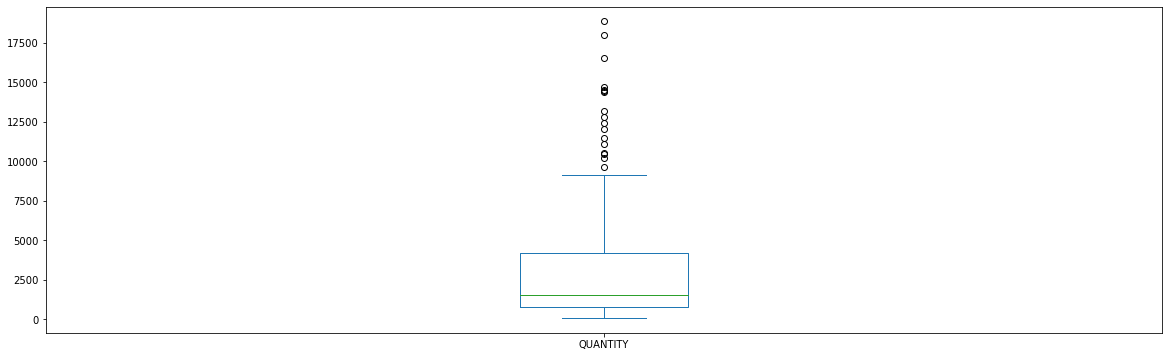

In [76]:
# Checking for Outliers using Boxplot

new_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6)) 
plt.subplots_adjust(wspace = 0.75) 
plt.show()

In [77]:
# Treating the outliers

from feature_engine.outliers import Winsorizer

winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['QUANTITY'])
winsor = winsorizer.fit(new_df[['QUANTITY']])
joblib.dump(winsor, "winsor")
new_df.QUANTITY = winsor.transform(new_df[['QUANTITY']])

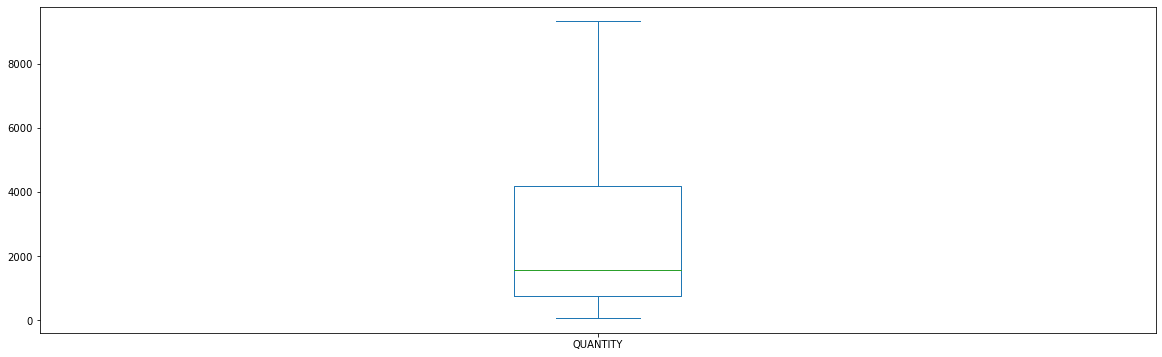

In [78]:
# Checking for Outliers 

new_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6)) 
plt.subplots_adjust(wspace = 0.75) 
plt.show()

In [79]:
new_df

,QUANTITY
POSTING DATE,
2019-12-08,400.0
2019-12-15,300.0
2019-12-22,200.0
2019-12-29,1000.0
2020-01-05,960.0
...,...
2022-10-30,525.5
2022-11-06,100.0
2022-11-13,875.0


#### Transformations - To check for Normal Distributions

Text(0.5, 1.0, 'Q-Q plot of original data')

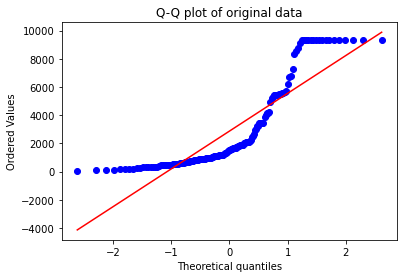

In [34]:
# Normal Quantile-Quantile Plot - To convert Inconsistent data(non-linear) into Consistent data(linear)

import scipy.stats as stats
import pylab

# Checking Whether data is normally distributed
stats.probplot(new_df.QUANTITY, dist="norm", plot=pylab)
plt.title("Q-Q plot of original data")


Text(0.5, 1.0, 'Q-Q plot of log-transformed data')

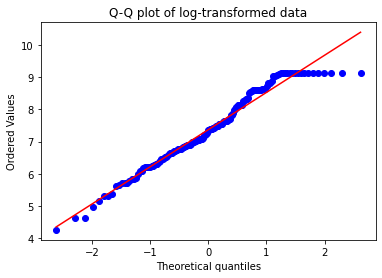

In [35]:
# Create a Q-Q plot of the transformed data

stats.probplot(np.log(new_df["QUANTITY"]), dist="norm", plot=plt)
plt.title("Q-Q plot of log-transformed data")

Text(0.5, 1.0, 'Q-Q plot of sqrt-transformed data')

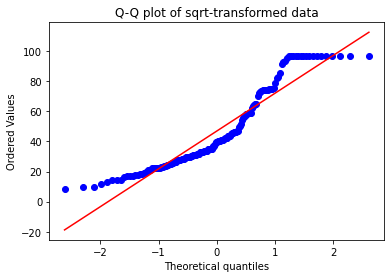

In [36]:
# Create a Q-Q plot of the transformed data

stats.probplot(np.sqrt(new_df["QUANTITY"]), dist="norm", plot=plt)
plt.title("Q-Q plot of sqrt-transformed data")

In [37]:
from statsmodels.tsa.stattools import adfuller

passing_data=adfuller(new_df['QUANTITY'])

def adf_test(QUANTITY):
    result=adfuller(QUANTITY)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")
        
adf_test(new_df['QUANTITY'])

Test parameters : -4.677367132989027
p-value : 9.278872685107459e-05
#Lags Used : 0
Dataset observations : 155
Dataset is stationary


#### Splitting data for train & test split

In [80]:
df = new_df
df

,QUANTITY
POSTING DATE,
2019-12-08,400.0
2019-12-15,300.0
2019-12-22,200.0
2019-12-29,1000.0
2020-01-05,960.0
...,...
2022-10-30,525.5
2022-11-06,100.0
2022-11-13,875.0


In [81]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [82]:
train_data.shape

(124, 1)

In [83]:
test_data.shape

(32, 1)

### Model Building

##### ARIMA Model

ARIMA is a popular time series forecasting model that combines autoregression (AR), differencing (I), and moving average (MA) components. It is useful for analyzing and forecasting data that exhibit temporal dependencies.

In [45]:
from statsmodels.tsa.arima_model import ARIMA

# Fit an ARIMA model to the data
ARIMA_model = sm.tsa.ARIMA(train_data, order=(2, 2, 0))  # Choose p=2, d=2, and q=0
results = ARIMA_model.fit()

# Make predictions on the training data
# (assuming train_data is a pandas DataFrame with the same columns as df)
Train_Predictions = results.predict(start=train_data.index[0], end=train_data.index[-1], dynamic = False)

# Make predictions on the testing data
# (assuming test_data is a pandas DataFrame with the same columns as df)
Test_Predictions = results.predict(start=test_data.index[0], end=test_data.index[-1], dynamic = False)

# Generate predictions for future data
future = pd.date_range(start=df.index[-1], periods=48, freq='W')
future_pred = results.forecast(steps= len(future))

# Calculate performance metrics for the predictions
mape = mean_absolute_percentage_error(test_data, Test_Predictions)
# Calculate root mean squared error
rmse = mean_squared_error(test_data, Test_Predictions, squared=False)
print('MAPE:', mape)
print('RMSE:', rmse)

MAPE: 5.38299217422491
RMSE: 7365.815772783848


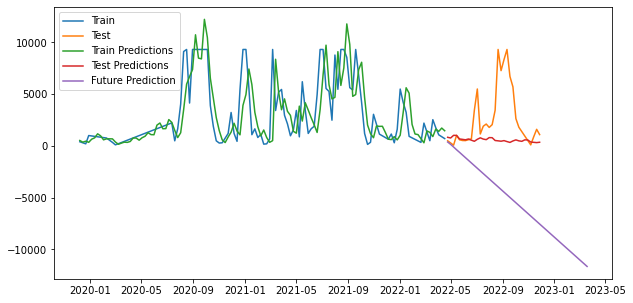

In [46]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['QUANTITY'], label='Train')
plt.plot(test_data.index, test_data['QUANTITY'], label='Test')
plt.plot(train_data.index, train_predictions, label='Train Predictions')
plt.plot(test_data.index, test_predictions, label='Test Predictions')
plt.plot(future_pred.index, future_pred, label ='Future Prediction')
plt.legend()
plt.show()

#### SARIMA Model 

SARIMA is an extension of the ARIMA model that is designed to handle seasonal patterns in time series data. It includes additional seasonal parameters (P, D, and Q) that capture the seasonal trends and help to improve the accuracy of the model. The SARIMA model is a powerful tool for forecasting time series data that exhibit seasonal behavior

In [47]:
# Fit a SARIMA model to the data
SARIMA_model = sm.tsa.statespace.SARIMAX(train_data, order=(2, 1, 0), seasonal_order=(1, 1, 0, 12))
results = SARIMA_model.fit()

# Make predictions on the training data
train_predictions = results.predict(start=train_data.index[0], end=train_data.index[-1], dynamic=False)

# Make predictions on the testing data
test_predictions = results.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

# Generate predictions for future data
future = pd.date_range(start=df.index[-1], periods=48, freq='W')
future_pred = results.forecast(steps= len(future))

# Calculate performance metrics for the predictions
mape = mean_absolute_percentage_error(test_data, test_predictions)
rmse = mean_squared_error(test_data, test_predictions, squared=False)

print('MAPE:', mape)
print('RMSE:', rmse)

MAPE: 2.237818388413624
RMSE: 4175.709133574672


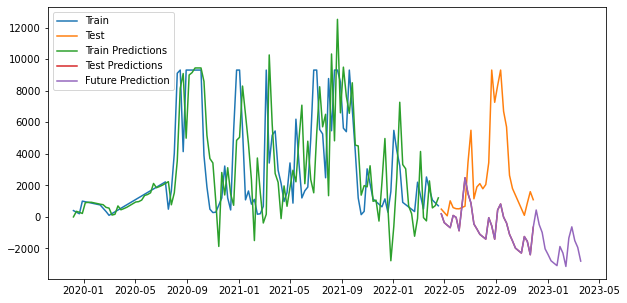

In [48]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['QUANTITY'], label='Train')
plt.plot(test_data.index, test_data['QUANTITY'], label='Test')
plt.plot(train_data.index, train_predictions, label='Train Predictions')
plt.plot(test_data.index, test_predictions, label='Test Predictions')
plt.plot(future_pred.index, future_pred, label ='Future Prediction')
plt.legend()
plt.show()

##### Simple Exponential  Smoothing

Simple Exponential Smoothing is a time series forecasting technique that uses a weighted average of past observations to predict future values.

In [49]:
from statsmodels.tsa.api import SimpleExpSmoothing

alpha = 0.2
ses = SimpleExpSmoothing(train_data)
results = ses.fit(smoothing_level = alpha, optimized = False)

# Make predictions on the training data
# (assuming train_data is a pandas DataFrame with the same columns as df)
Train_Predictions = results.predict(start=train_data.index[0], end=train_data.index[-1])

# Make predictions on the testing data
# (assuming test_data is a pandas DataFrame with the same columns as df)
Test_Predictions = results.predict(start=test_data.index[0], end=test_data.index[-1])

# Generate predictions for future data
future_pred = results.forecast(steps=12)

# Calculate performance metrics for the predictions
mape = mean_absolute_percentage_error(test_data, Test_Predictions)

# Calculate root mean squared error
rmse = mean_squared_error(test_data, Test_Predictions, squared=False)

print('MAPE:', mape)
print('RMSE:', rmse)

MAPE: 1.568074395334841
RMSE: 3102.9833222790317


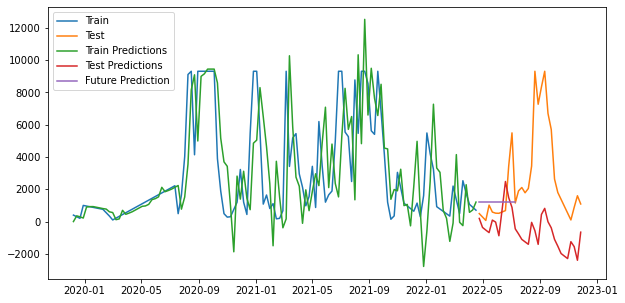

In [50]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['QUANTITY'], label='Train')
plt.plot(test_data.index, test_data['QUANTITY'], label='Test')
plt.plot(train_data.index, train_predictions, label='Train Predictions')
plt.plot(test_data.index, test_predictions, label='Test Predictions')
plt.plot(future_pred.index, future_pred, label ='Future Prediction')
plt.legend()
plt.show()

##### Autoregressive Moving Average  (ARMA) Model

ARMA is a popular time series forecasting model that combines autoregression (AR) and moving average (MA) components. It is a simplified version of the ARIMA model that does not include differencing. The ARMA model can be used to analyze and forecast data that exhibit temporal dependencies and can be effective for modeling stationary time series data.

In [51]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model to the data
ARMA_model = ARIMA(endog = train_data, order=(0, 0, 10))
results = ARMA_model.fit()

# Make predictions on the training data
train_predictions = results.predict(start=train_data.index[0], end=train_data.index[-1], dynamic=False)

# Make predictions on the testing data
test_predictions = results.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

# Generate predictions for future data
future = pd.date_range(start=df.index[-1], periods=48, freq='W')
future_pred = results.forecast(steps= len(future))

# Calculate performance metrics for the predictions
mape = mean_absolute_percentage_error(test_data, test_predictions)
rmse = mean_squared_error(test_data, test_predictions, squared=False)

print('MAPE:', mape)
print('RMSE:', rmse)

MAPE: 3.2158028266911307
RMSE: 2659.7986794823123


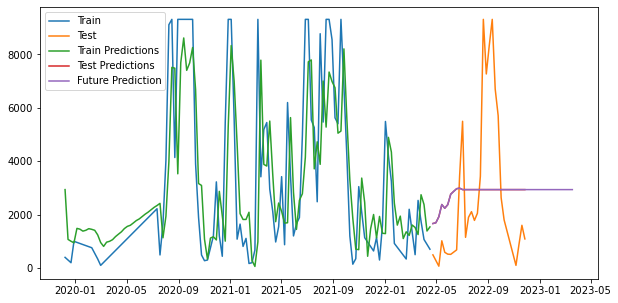

In [52]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['QUANTITY'], label='Train')
plt.plot(test_data.index, test_data['QUANTITY'], label='Test')
plt.plot(train_data.index, train_predictions, label='Train Predictions')
plt.plot(test_data.index, test_predictions, label='Test Predictions')
plt.plot(future_pred.index, future_pred, label ='Future Prediction')
plt.legend()
plt.show()

##### Holt-Winters Method 

Holt Winter is a time series forecasting model that includes exponential smoothing, trend, and seasonal components. The Holt Winter model is a powerful tool for forecasting time series data that exhibit complex patterns of seasonality and trend.

In [89]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

# Fit an HWES model to the data
HWES_model = HWES(train_data, seasonal_periods=12, trend='add', seasonal='mul')
HWES_model_results = HWES_model.fit()

# Make predictions on the training data
train_predictions = HWES_model_results.predict(start=train_data.index[0], end=train_data.index[-1])

# Make predictions on the testing data
test_predictions = HWES_model_results.predict(start=test_data.index[0], end=test_data.index[-1])

# Generate predictions for future data
future = pd.date_range(start=df.index[-1], periods=48, freq='W')
future_pred = HWES_model_results.forecast(steps= len(future))

# Calculate performance metrics for the predictions
mape = mean_absolute_percentage_error(test_data, test_predictions)
rmse = mean_squared_error(test_data, test_predictions, squared=False)

print('MAPE:', mape)
print('RMSE:', rmse)

MAPE: 1.1046545111052943
RMSE: 3494.532772030833


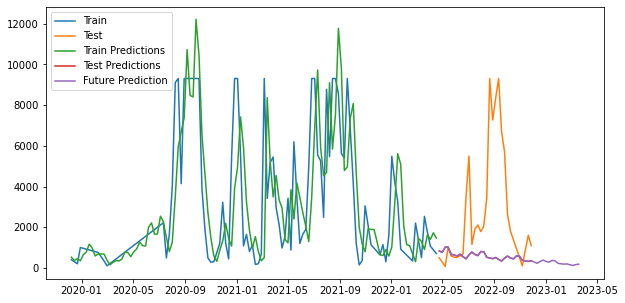

In [61]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['QUANTITY'], label='Train')
plt.plot(test_data.index, test_data['QUANTITY'], label='Test')
plt.plot(train_data.index, train_predictions, label='Train Predictions')
plt.plot(test_data.index, test_predictions, label='Test Predictions')
plt.plot(future_pred.index, future_pred, label ='Future Prediction')
plt.legend()
plt.show()

##### Autoregressive (AR) Model 

AR is a time series forecasting model that uses past observations to predict future values. It is a type of autoregressive model that includes only the autoregressive component, without differencing or moving average components

In [55]:
from statsmodels.tsa.ar_model import AutoReg

# Fit an ARIMA model to the data
ar_model = AutoReg(train_data, lags=8)
results = ar_model.fit()

# Make predictions on the training data
train_predictions = results.predict(start=train_data.index[0], end=train_data.index[-1])

# Make predictions on the testing data
test_predictions = results.predict(start=test_data.index[0], end=test_data.index[-1])

# Generate predictions for future data
future = pd.date_range(start=df.index[-1], periods=48, freq='W')
future_pred = results.forecast(steps= len(future))

# Calculate performance metrics for the predictions
mape = mean_absolute_percentage_error(test_data, test_predictions)
rmse = mean_squared_error(test_data, test_predictions, squared=False)

print('MAPE:', mape)
print('RMSE:', rmse)

MAPE: 3.5247535343282648
RMSE: 2675.0622935948304


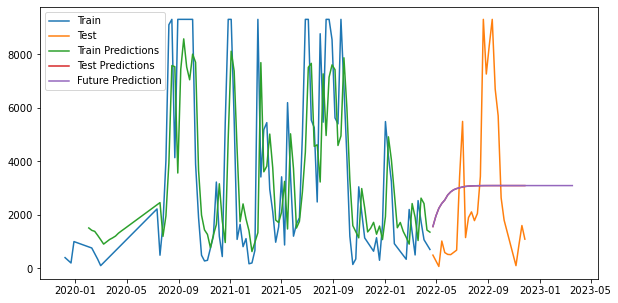

In [56]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['QUANTITY'], label='Train')
plt.plot(test_data.index, test_data['QUANTITY'], label='Test')
plt.plot(train_data.index, train_predictions, label='Train Predictions')
plt.plot(test_data.index, test_predictions, label='Test Predictions')
plt.plot(future_pred.index, future_pred, label ='Future Prediction')
plt.legend()
plt.show()

#### Model Selection 

In [90]:
# Saving the best model using Pickle library

HWES_model_results.save("model.pickle")
